<img src="../Pierian-Data-Logo.PNG">
<br>
<strong><center>Copyright 2019. Created by Jose Marcial Portilla.</center></strong>

# CNN Exercises
For these exercises we'll work with the <a href='https://www.kaggle.com/zalando-research/fashionmnist'>Fashion-MNIST</a> dataset, also available through <a href='https://pytorch.org/docs/stable/torchvision/index.html'><tt><strong>torchvision</strong></tt></a>. Like MNIST, this dataset consists of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes:
0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot

<div class="alert alert-danger" style="margin: 10px"><strong>IMPORTANT NOTE!</strong> Make sure you don't run the cells directly above the example output shown, <br>otherwise you will end up writing over the example output!</div>

## Perform standard imports, load the Fashion-MNIST dataset
Run the cell below to load the libraries needed for this exercise and the Fashion-MNIST dataset.<br>
PyTorch makes the Fashion-MNIST dataset available through <a href='https://pytorch.org/docs/stable/torchvision/datasets.html#fashion-mnist'><tt><strong>torchvision</strong></tt></a>. The first time it's called, the dataset will be downloaded onto your computer to the path specified. From that point, torchvision will always look for a local copy before attempting another download.

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

transform = transforms.ToTensor()

train_data = datasets.FashionMNIST(root='../Data', train=True, download=True, transform=transform)
test_data = datasets.FashionMNIST(root='../Data', train=False, download=True, transform=transform)

class_names = ['T-shirt','Trouser','Sweater','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Boot']

## 1. Create data loaders
Use DataLoader to create a <tt>train_loader</tt> and a <tt>test_loader</tt>. Batch sizes should be 10 for both.

In [2]:
# CODE HERE
torch.manual_seed(42)
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=True)


In [2]:
# DON'T WRITE HERE

## 2. Examine a batch of images
Use DataLoader, <tt>make_grid</tt> and matplotlib to display the first batch of 10 images.<br>
OPTIONAL: display the labels as well

Label: [6 5 0 7 9 3 5 1 3 5]
Class: Shirt Sandal T-shirt Sneaker Boot Dress Sandal Trouser Dress Sandal


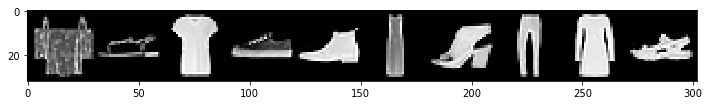

In [70]:
# CODE HERE
# Grab the first batch of 10 images
for images,labels in train_loader: 
    break

# Print the labels
print('Label:', labels.numpy())
print('Class:', *np.array([class_names[i] for i in labels]))

im = make_grid(images, nrow=10)  # the default nrow is 8

# Inverse normalize the images
# inv_normalize = transforms.Normalize(
#     mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
#     std=[1/0.229, 1/0.224, 1/0.225]
# )
# im_inv = inv_normalize(im)

# Print the images
plt.figure(figsize=(12,4))
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

#? why not black


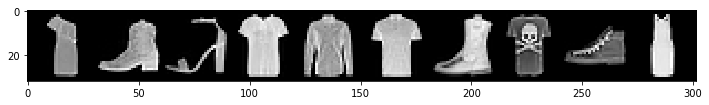

In [3]:
# DON'T WRITE HERE
# IMAGES ONLY

Label:  [9 2 5 9 4 2 1 2 7 3]
Class:  Boot Sweater Sandal Boot Coat Sweater Trouser Sweater Sneaker Dress


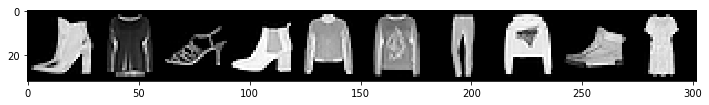

In [4]:
# DON'T WRITE HERE
# IMAGES AND LABELS

## Downsampling
<h3>3. If a 28x28 image is passed through a Convolutional layer using a 5x5 filter, a step size of 1, and no padding, what is the resulting matrix size?</h3>

<div style='border:1px black solid; padding:5px'>
<br><br>
</div>

In [19]:
##################################################
###### ONLY RUN THIS TO CHECK YOUR ANSWER! ######
################################################

# Run the code below to check your answer:
conv = nn.Conv2d(1, 1, 5, 1)
for x,labels in train_loader:
    print('Orig size:',x.shape)
    break
x = conv(x)
print('Down size:',x.shape)

Orig size: torch.Size([10, 1, 28, 28])
Down size: torch.Size([10, 1, 24, 24])


### 4. If the sample from question 3 is then passed through a 2x2 MaxPooling layer, what is the resulting matrix size?

<div style='border:1px black solid; padding:5px'>
<br><br>
</div>

In [20]:
##################################################
###### ONLY RUN THIS TO CHECK YOUR ANSWER! ######
################################################

# Run the code below to check your answer:
x = F.max_pool2d(x, 2, 2)
print('Down size:',x.shape)

Down size: torch.Size([10, 1, 12, 12])


## CNN definition
### 5. Define a convolutional neural network
Define a CNN model that can be trained on the Fashion-MNIST dataset. The model should contain two convolutional layers, two pooling layers, and two fully connected layers. You can use any number of neurons per layer so long as the model takes in a 28x28 image and returns an output of 10. Portions of the definition have been filled in for convenience.

In [78]:
# CODE HERE
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 3, 1)
        self.conv2 = nn.Conv2d(6, 16, 3, 1)
        self.fc1 = nn.Linear(5*5*16, 100)
        self.fc2 = nn.Linear(100, 10)

    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        X = X.view(-1, 5*5*16)
        X = F.relu(self.fc1(X))
        X = self.fc2(X)
        return F.log_softmax(X, dim=1)
    
torch.manual_seed(101)
model = ConvolutionalNetwork()

## Trainable parameters

### 6. What is the total number of trainable parameters (weights & biases) in the model above?
Answers will vary depending on your model definition.

<div style='border:1px black solid; padding:5px'>
<br><br>
</div>

In [79]:
# CODE HERE
def count_parameters(model):
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    for item in params:
        print(f'{item:>8}')
    print(f'________\n{sum(params):>8}')
count_parameters(model)

      54
       6
     864
      16
   40000
     100
    1000
      10
________
   42050


### 7. Define loss function & optimizer
Define a loss function called "criterion" and an optimizer called "optimizer".<br>
You can use any functions you want, although we used Cross Entropy Loss and Adam (learning rate of 0.001) respectively.

In [80]:
# CODE HERE
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
model


ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=10, bias=True)
)

In [6]:
# DON'T WRITE HERE

### 8. Train the model
Don't worry about tracking loss values, displaying results, or validating the test set. Just train the model through 5 epochs. We'll evaluate the trained model in the next step.<br>
OPTIONAL: print something after each epoch to indicate training progress.

In [81]:
# CODE HERE
import time
start_time = time.time()

epochs = 5
max_trn_batch = 800
max_tst_batch = 300

train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    for b, (X_train, y_train) in enumerate(train_loader):
        # if b == max_trn_batch:
        #     break
        b+=1 
        
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)

        # Gather the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print interim results
        if b%200 == 0:
            print(f'epoch: {i:2} batch: {b:4} [{10*b:6}/8000] loss: {loss.item():10.8f} \
                accuracy: {trn_corr.item()*100/(10*b):7.3f}%')

    train_losses.append(loss)
    train_correct.append(trn_corr)
    
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):
            # Limit the number of batches
            if b == max_tst_batch:
                break
            
            # Apply the model
            y_val = model(X_test)
            
            # Gather the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1]
            tst_corr += (predicted == y_test).sum()
            
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
    
print(f'n\Duration: {time.time() - start_time:.0f} seconds')


# print(predicted)



epoch:  0 batch:  200 [  2000/8000] loss: 1.05726635                 accuracy:  47.050%
epoch:  0 batch:  400 [  4000/8000] loss: 0.30583900                 accuracy:  58.775%
epoch:  0 batch:  600 [  6000/8000] loss: 0.45677218                 accuracy:  62.400%
epoch:  0 batch:  800 [  8000/8000] loss: 1.58809316                 accuracy:  65.213%
epoch:  0 batch: 1000 [ 10000/8000] loss: 0.74217767                 accuracy:  67.600%
epoch:  0 batch: 1200 [ 12000/8000] loss: 0.37377340                 accuracy:  69.242%
epoch:  0 batch: 1400 [ 14000/8000] loss: 0.42143115                 accuracy:  70.571%
epoch:  0 batch: 1600 [ 16000/8000] loss: 0.78547537                 accuracy:  71.575%
epoch:  0 batch: 1800 [ 18000/8000] loss: 0.42953658                 accuracy:  72.439%
epoch:  0 batch: 2000 [ 20000/8000] loss: 0.30137333                 accuracy:  73.220%
epoch:  0 batch: 2200 [ 22000/8000] loss: 0.45630437                 accuracy:  73.886%
epoch:  0 batch: 2400 [ 24000/80

In [94]:
test_correct


[tensor(2478), tensor(2568), tensor(2610), tensor(2563), tensor(2637)]

In [60]:
print(y_pred.data)

tensor([[-2.3138, -2.3899, -2.2873, -2.2935, -2.2675, -2.3380, -2.3265, -2.2004,
         -2.2977, -2.3225],
        [-2.3341, -2.3926, -2.2773, -2.2967, -2.2715, -2.3222, -2.3242, -2.2052,
         -2.2948, -2.3180],
        [-2.3241, -2.3956, -2.2730, -2.3042, -2.2618, -2.3254, -2.3295, -2.2005,
         -2.3005, -2.3233],
        [-2.3164, -2.3936, -2.2724, -2.2932, -2.2758, -2.3334, -2.3230, -2.2039,
         -2.3002, -2.3250],
        [-2.3215, -2.3935, -2.2825, -2.2973, -2.2660, -2.3255, -2.3206, -2.2164,
         -2.2951, -2.3169],
        [-2.3314, -2.3876, -2.2843, -2.3042, -2.2704, -2.3190, -2.3323, -2.1998,
         -2.2930, -2.3146],
        [-2.3283, -2.3937, -2.2810, -2.2938, -2.2702, -2.3272, -2.3217, -2.2083,
         -2.2954, -2.3164],
        [-2.3234, -2.3951, -2.2827, -2.2914, -2.2666, -2.3279, -2.3237, -2.2010,
         -2.3027, -2.3226],
        [-2.3349, -2.3868, -2.2828, -2.2930, -2.2682, -2.3189, -2.3396, -2.2096,
         -2.2907, -2.3115],
        [-2.3287, -

1 of 5 epochs completed
2 of 5 epochs completed
3 of 5 epochs completed
4 of 5 epochs completed
5 of 5 epochs completed


### 9. Evaluate the model
Set <tt>model.eval()</tt> and determine the percentage correct out of 10,000 total test images.

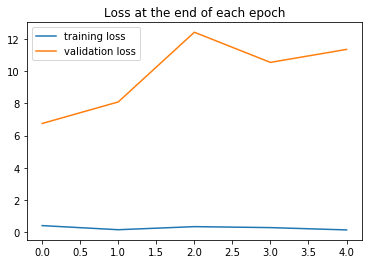

In [82]:
# CODE HERE
plt.plot(train_losses, label='training loss')
plt.plot(test_losses, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();





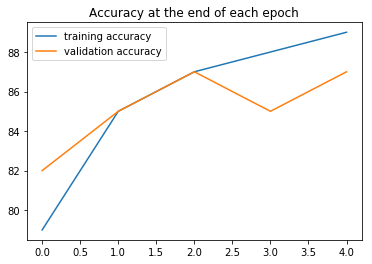

In [97]:
plt.plot([t/600 for t in train_correct], label='training accuracy') #?
plt.plot([t/30 for t in test_correct], label='validation accuracy')
plt.title('Accuracy at the end of each epoch')
plt.legend();

In [84]:
print(test_correct)
print(f'Test accuracy: {test_correct[-1].item()*100/3000:.3f}%')

[tensor(2478), tensor(2568), tensor(2610), tensor(2563), tensor(2637)]
Test accuracy: 87.900%


Test accuracy: 8733/10000 =  87.330%


## Great job!